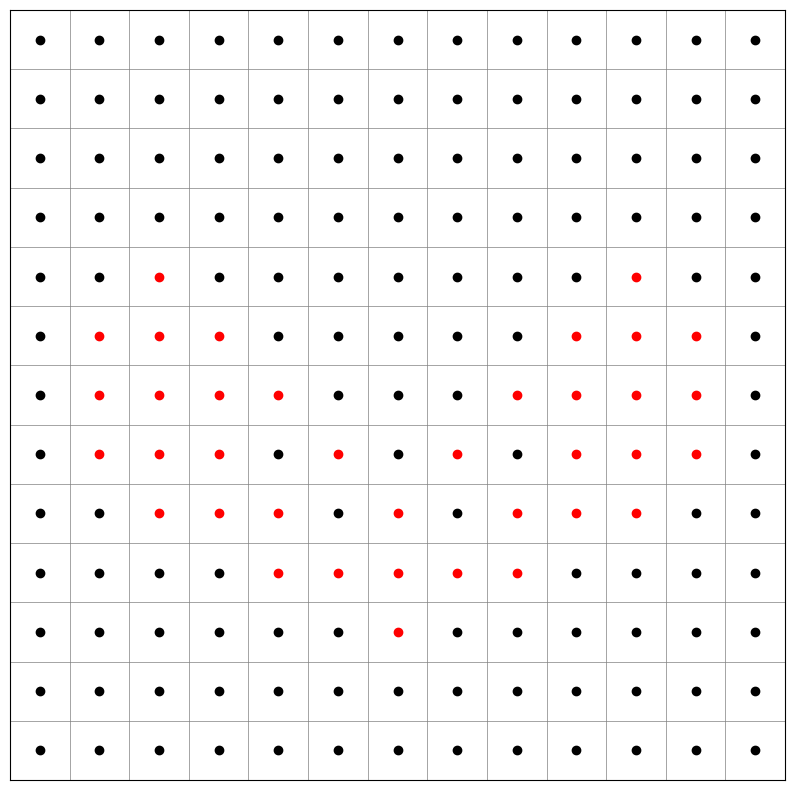

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("scalars_2D.npy")
rows, cols = data.shape

isovalue = 50

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xticks(np.arange(cols + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(rows + 1) - 0.5, minor=True)
ax.grid(which="minor", color='gray', linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", size=0)
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(-0.5, rows - 0.5)
ax.set_xticks([])
ax.set_yticks([])

# Function to draw a dot at the center of each cell
def draw_dot(point, color):
    ax.scatter(point[1], rows - point[0] - 1, color=color)

# Draw dots
for i in range(rows):
    for j in range(cols):
        color = 'red' if data[i, j] >= isovalue else 'black'
        draw_dot((i, j), color)

plt.show()

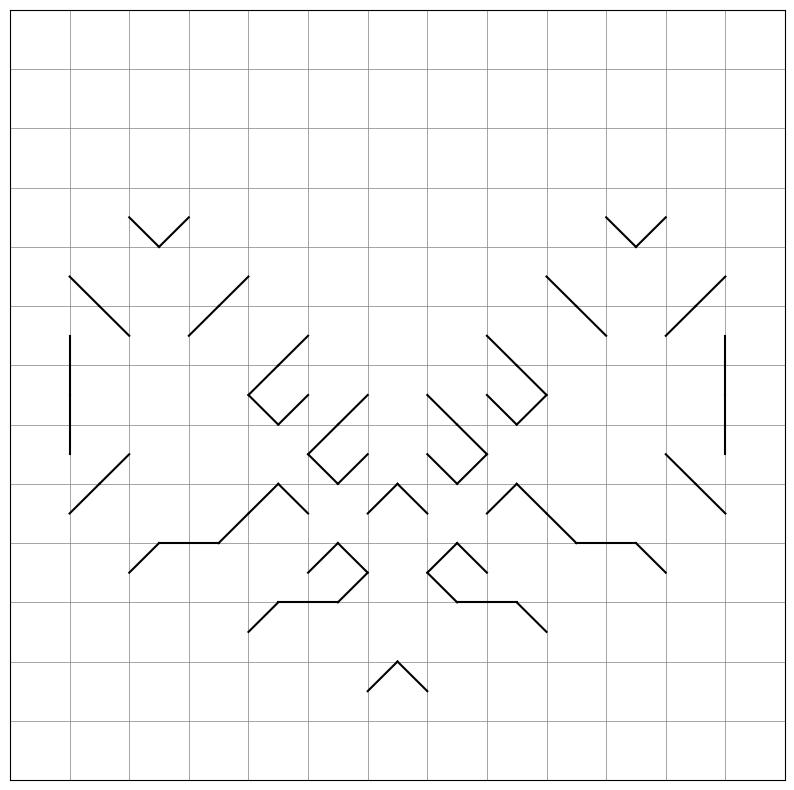

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("scalars_2D.npy")
rows, cols = data.shape

isovalue = 50

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xticks(np.arange(cols + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(rows + 1) - 0.5, minor=True)
ax.grid(which="minor", color='gray', linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", size=0)
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(-0.5, rows - 0.5)
ax.set_xticks([])
ax.set_yticks([])

def draw_line(point0, point1):
    ax.plot([point0[1], point1[1]], [rows - point0[0] - 1, rows - point1[0] - 1], 'k')

cases = {
    1: [(0.5, 0), (0, 0.5)],
    2: [(1, 0.5), (0.5, 0)],
    3: [(1, 0.5), (0, 0.5)],
    4: [(0.5, 1), (1, 0.5)],
    5: [(0.5, 1), (0, 0.5), (1, 0.5), (0.5, 0)],
    6: [(0.5, 1), (0.5, 0)],
    7: [(0.5, 1), (0, 0.5)],
    8: [(0.5, 1), (0, 0.5)],
    9: [(0.5, 1), (0.5, 0)],
    10: [(0.5, 1), (1, 0.5), (0, 0.5), (0.5, 0)],
    11: [(0.5, 1), (1, 0.5)],
    12: [(1, 0.5), (0, 0.5)],
    13: [(1, 0.5), (0.5, 0)],
    14: [(0.5, 0), (0, 0.5)],
}

def get_case(val1, val2, val3, val4):
    return (val1 >= isovalue) * 8 + (val2 >= isovalue) * 4 + (val3 >= isovalue) * 2 + (val4 >= isovalue) * 1

for i in range(rows - 1):
    for j in range(cols - 1):
        case = get_case(data[i, j], data[i, j + 1], data[i + 1, j + 1], data[i + 1, j])
        if case in cases:
            points = cases[case]
            for k in range(0, len(points), 2):
                x1, y1 = points[k]
                x2, y2 = points[k + 1]
                draw_line((i + y1, j + x1), (i + y2, j + x2))

plt.show()

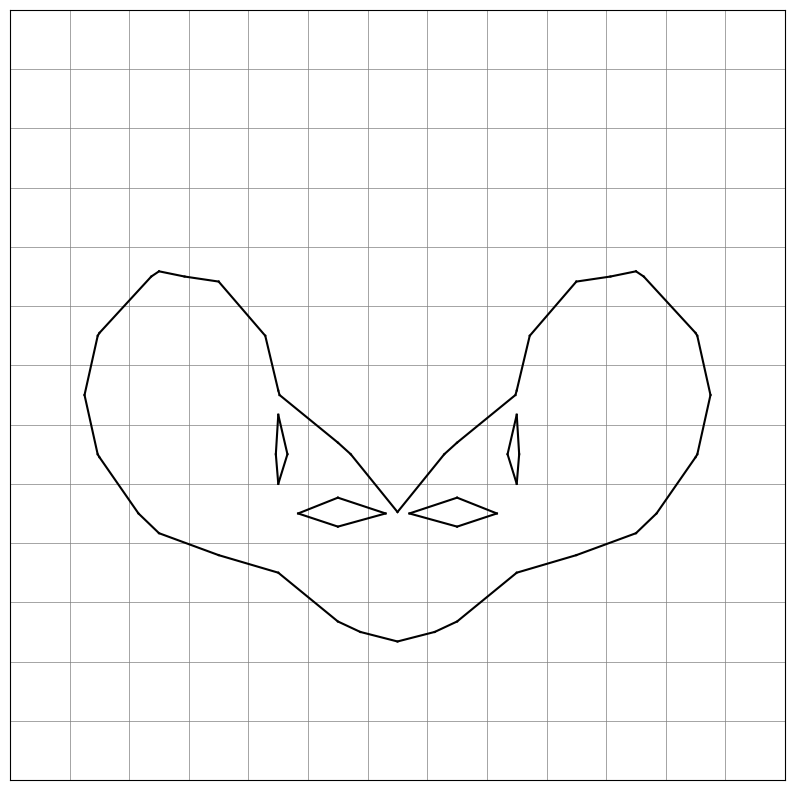

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("scalars_2D.npy")
rows, cols = data.shape

isovalue = 50

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xticks(np.arange(cols + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(rows + 1) - 0.5, minor=True)
ax.grid(which="minor", color='gray', linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", size=0)
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(-0.5, rows - 0.5)
ax.set_xticks([])
ax.set_yticks([])

def interpolate(v1, v2):
    if v1 == v2:
        return 0.5
    return (isovalue - v1) / (v2 - v1)

def draw_line(point0, point1):
    ax.plot([point0[1], point1[1]], [rows - point0[0] - 1, rows - point1[0] - 1], 'k')

for i in range(rows - 1):
    for j in range(cols - 1):
        v1, v2 = data[i, j], data[i, j + 1]
        v3, v4 = data[i + 1, j + 1], data[i + 1, j]

        left = (i + interpolate(v1, v4), j)
        right = (i + interpolate(v2, v3), j + 1)
        bottom = (i + 1, j + interpolate(v4, v3))
        top = (i, j + interpolate(v1, v2))

        case = (v1 >= isovalue) * 8 + (v2 >= isovalue) * 4 + (v3 >= isovalue) * 2 + (v4 >= isovalue) * 1

        cases = {
            1: [left, bottom],
            2: [bottom, right],
            3: [left, right],
            4: [top, right],
            5: [top, left, bottom, right],
            6: [top, bottom],
            7: [top, left],
            8: [top, left],
            9: [top, bottom],
            10: [top, right, bottom, left],
            11: [top, right],
            12: [left, right],
            13: [bottom, right],
            14: [left, bottom],
        }

        if case in cases:
            points = cases[case]
            for k in range(0, len(points), 2):
                draw_line(points[k], points[k + 1])

plt.show()
